In [2]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 


from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

# Data Set Description


* **Encounter ID**	Unique identifier of an encounter
* **Patient number**	Unique identifier of a patient
* **Race**	Values: Caucasian, Asian, African American, Hispanic, and other
* **Gender**	Values: male, female, and unknown/invalid
* **Age**	Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)
* **Weight**	Weight in pounds
* **Admission type**	Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available
* **Discharge disposition**	Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available
* **Admission source**	Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital
* **Time in hospital**	Integer number of days between admission and discharge
* **Payer code**	Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical
* **Medical specialty**	Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon
* **Number of lab procedures**	Number of lab tests performed during the encounter
* **Number of procedures** Numeric	Number of procedures (other than lab tests) performed during the encounter
* **Number of medications**	Number of distinct generic names administered during the encounter
* **Number of outpatient visits** Number of outpatient visits of the patient in the year preceding the encounter
* **Number of emergency visits**	Number of emergency visits of the patient in the year preceding the encounter
* **Number of inpatient visits**	Number of inpatient visits of the patient in the year preceding the encounter
* **Diagnosis 1**	The primary diagnosis (coded as first three digits of ICD9); 848 distinct values
* **Diagnosis 2**	Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values
* **Diagnosis 3** Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values
* **Number of diagnoses**	Number of diagnoses entered to the system 0%
* **Glucose serum test result**	Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured
* **A1c test result**	Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.
* **Change of medications**	Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”
* **Diabetes medications**	Indicates if there was any diabetic medication prescribed. Values: “yes” and “no”
* 24 features for medications	For the generic names: **metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone**, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed
* **Readmitted**	Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission










# Data Dictionary

# admission_type_id	Description
1.	Emergency
2.	Urgent	
3.	Elective	
4.	Newborn	
5.	Not Available
6.	NULL	
7.	Trauma Center
8.	Not Mapped
		
# discharge_disposition_id	Description
1.	Discharged to home
2.	Discharged/transferred to another short term hospital
3.	Discharged/transferred to SNF
4.	Discharged/transferred to ICF
5. Discharged/transferred to another type of inpatient care institution
6.	Discharged/transferred to home with home health service
7.	Left AMA	
8.	Discharged/transferred to home under care of Home IV provider
9.	Admitted as an inpatient to this hospital
10.	Neonate discharged to another hospital for neonatal aftercare
11.	Expired	
12.	Still patient or expected to return for outpatient services
13.	Hospice / home
14.	Hospice / medical facility
15.	Discharged/transferred within this institution to Medicare approved swing bed
16.	Discharged/transferred/referred another institution for outpatient services
17.	Discharged/transferred/referred to this institution for outpatient services
18.	NULL	
19.	Expired at home. Medicaid only, hospice.
20.	Expired in a medical facility. Medicaid only, hospice.
21.	Expired, place unknown. Medicaid only, hospice.
22.	Discharged/transferred to another rehab fac including rehab units of a hospital .
23.	Discharged/transferred to a long term care hospital.
24.	Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
25.	Not Mapped
26.	Unknown/Invalid
30.	Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere
27.	Discharged/transferred to a federal health care facility.
28.	Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital
29.	Discharged/transferred to a Critical Access Hospital (CAH).
		
# admission_source_id	Description
1.	 Physician Referral
2.	Clinic Referral
3.	HMO Referral
4.	Transfer from a hospital
5.	 Transfer from a Skilled Nursing Facility (SNF)
6.	 Transfer from another health care facility
7.	 Emergency Room
8.	 Court/Law Enforcement
9.	 Not Available
10.	 Transfer from critical access hospital
11.	Normal Delivery
12.	 Premature Delivery
13.	 Sick Baby	
14.	 Extramural Birth
15.	Not Available
17.	NULL	
18.	 Transfer From Another Home Health Agency
19.	Readmission to Same Home Health Agency
20.	 Not Mapped
21.	Unknown/Invalid
22.	 Transfer from hospital inpt/same fac reslt in a sep claim
23.	 Born inside this hospital
24.	 Born outside this hospital
25.	 Transfer from Ambulatory Surgery Center
26.	Transfer from Hospice



## Before I start, I realized that there are "?" sign that represented the NAN values. Getting rid of some information missing, I will replace them with np.nan

In [3]:
diabet = pd.read_csv('../input/diabetes/diabetic_data.csv')
diabet.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
diabet = diabet.replace("?",np.nan)

In [5]:
len(diabet.select_dtypes('O').columns)

37

In [6]:
diabet['readmitted'].value_counts()/len(diabet)

NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64

In [7]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [8]:
diabet.isnull().sum()[diabet.isnull().sum()>1]/len(diabet)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [9]:
diabet.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)






# **Exploratory Data Analysis and Visualizations**

In [10]:
 diabet['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

### **Readmitted**
This column our target feature. It is about **"days to inpatient readmission"**
* If the patient was readmitted in less than 30 days **"<30"**
* if the patient was readmitted in more than 30 days **">30"**
* If there is no record **"NO"**

We decided to reduce these values to two and map them according to the following rule;
* NO -> 0 <30 
*  >30 -> 1

In [11]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


0    90409
1    11357
Name: readmitted, dtype: int64


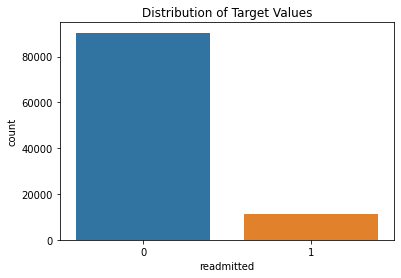

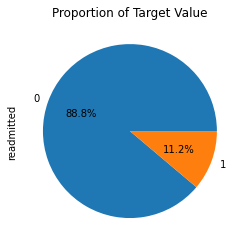

In [12]:
diabet = diabet.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabet.readmitted.value_counts())

sns.countplot(x = "readmitted", data = diabet)
plt.title("Distribution of Target Values")
plt.show()

# Pie chart
diabet.readmitted.value_counts().plot.pie(autopct = "%.1f%%")
plt.title("Proportion of Target Value")
plt.show()

### **Race**
We have 5 different races value, these are;
- Caucasian          
- AfricanAmerican    
- Hispanic            
- Asian
- Other 

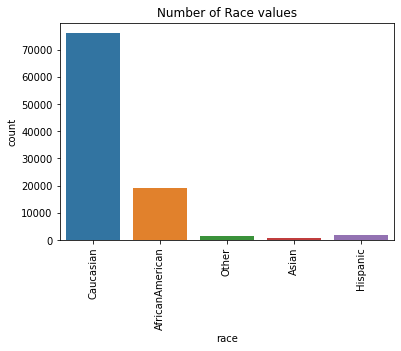

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


In [13]:
sns.countplot(x=diabet.race, data = diabet)
plt.xticks(rotation=90)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race")
print(diabet.race.value_counts(normalize = True)*100)

- As we see, there is **Caucasians** in 73 percent of all our data. 
And other other 22 percent is divided into **African Americans**, **Hispanics**, **Asians** and **Others**.<br>
- Here we decided to divide into 3 groups like **Caucasian**, **African American** and **Other**.

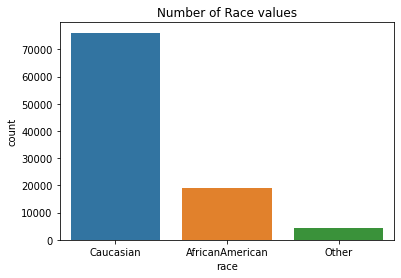

Proportion of Race After the Mapping
Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: race, dtype: float64


In [14]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
diabet.race = diabet.race.replace(mapped_race)

sns.countplot(x="race", data = diabet)
plt.title("Number of Race values")
plt.show()

print("Proportion of Race After the Mapping")
print(diabet.race.value_counts(normalize= True)*100)

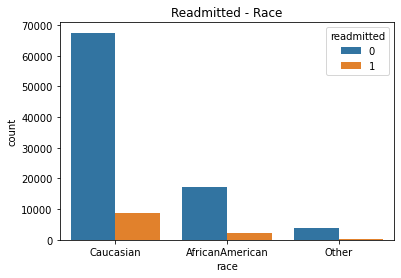

In [15]:
sns.countplot(x="race", hue= "readmitted", data = diabet)
plt.title("Readmitted - Race")
plt.show()

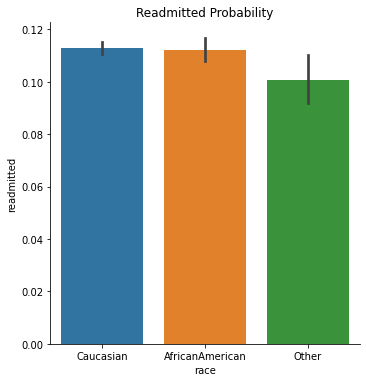

In [16]:
sns.catplot(x = "race", y = "readmitted",
            data = diabet, kind = "bar", height= 5)
plt.title("Readmitted Probability")
plt.show()

- Most of the patients are **Caucasian**, followed by **African Americans**.
- Although the **Other** values are few than **Caucasian**, 
we see that the **Readmitted Probability** almost close to **Caucasian**.

- Most of the patients are **Caucasian**, followed by **African Americans**.
- Although the **Other** values are few than **Caucasian**, 
we see that the **Readmitted Probability** almost close to **Caucasian**.

### **Gender**

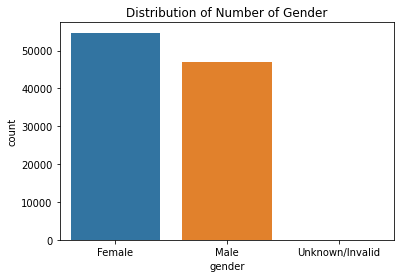

Proportions of Race Value
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


In [17]:
sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender")
plt.show()

print("Proportions of Race Value")
print(diabet.gender.value_counts(normalize = True))

- When we looked up **Gender** values, there is only one entry for **Unknown/Invalid**. So we dropped them

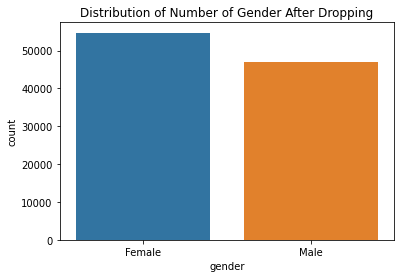

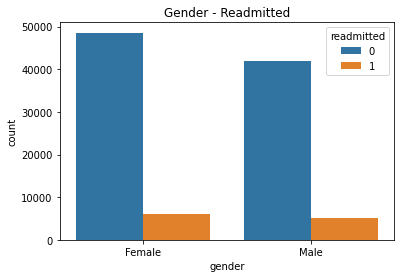

In [18]:
diabet = diabet.drop(diabet.loc[diabet["gender"]=="Unknown/Invalid"].index, axis=0)

sns.countplot(x = "gender", data = diabet)
plt.title("Distribution of Number of Gender After Dropping")
plt.show()

sns.countplot(x = "gender", hue = "readmitted", data = diabet)
plt.title("Gender - Readmitted")
plt.show()

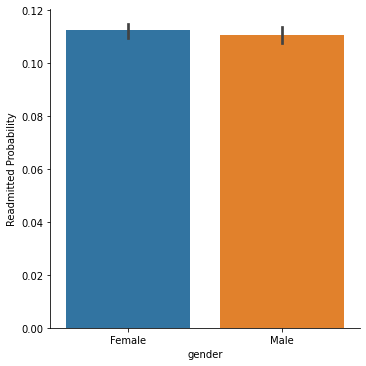

In [19]:
g = sns.catplot(x = "gender",y = "readmitted", 
                data = diabet, kind = "bar", height= 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- We see a nearly equal distribution of **Gender**.
- Also, we can state that **Females** are a little more prone than **Males**.

## **Age**

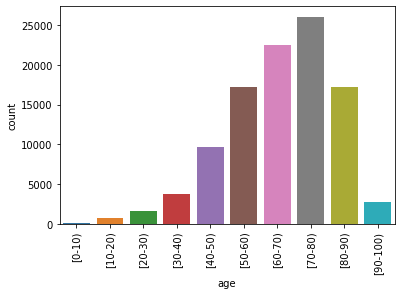

In [20]:
sns.countplot(x="age", data = diabet)
plt.xticks(rotation = 90)
plt.show()

* To get rid of this parenthesis notation and make the **Age** variable a numeric value, we changed it according to the following rule.

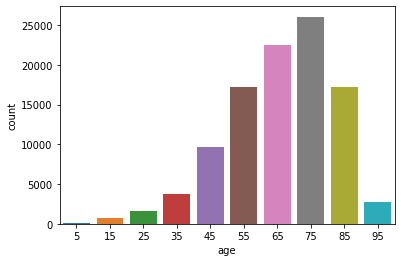

In [21]:
diabet.age = diabet.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

sns.countplot(x="age", data = diabet)
#plt.xticks(rotation = 90)
plt.show()

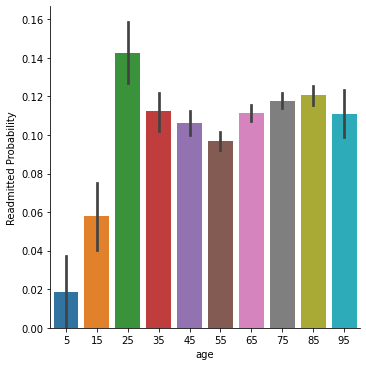

In [22]:
g = sns.catplot(x = "age", y = "readmitted", data = diabet, 
                   kind = "bar", height = 5)
g.set_ylabels("Readmitted Probability")
plt.show()

- we can understand that we have an **elderly population.**

### **Weight**

### **Admission Type ID**
Integer identifier corresponding to 9 distinct values;
- **Emergency**        : 1
- **Urgent**           : 2
- **Elective**         : 3
- **Newborn**          : 4
- **Not Available**    : 5
- **NULL**             : 6
- **Trauma Center**    : 7
- **Not Mapped**       : 8



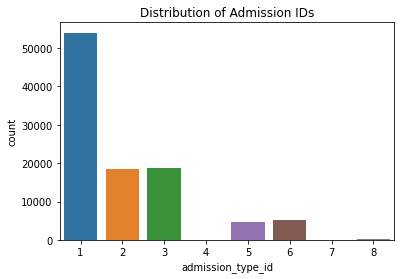

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


In [23]:
sns.countplot(x = "admission_type_id", data = diabet)
plt.title("Distribution of Admission IDs")
plt.show()

print("Distribution of ID's")
print(diabet.admission_type_id.value_counts())

In here we need to do mapping for :
- **NULL**, **Not Available** and **Not Mapped** values.
- In addition, we will map **Urgent** value as **Emergency** because they have same meaning

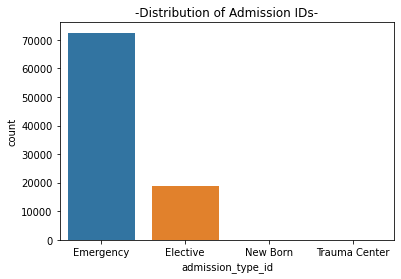

-Distribution of ID's-
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


In [24]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabet.admission_type_id = diabet.admission_type_id.replace(mapped)

sns.countplot(x = "admission_type_id", data = diabet)
plt.title("-Distribution of Admission IDs-")
plt.show()

print("-Distribution of ID's-")
print(diabet.admission_type_id.value_counts())

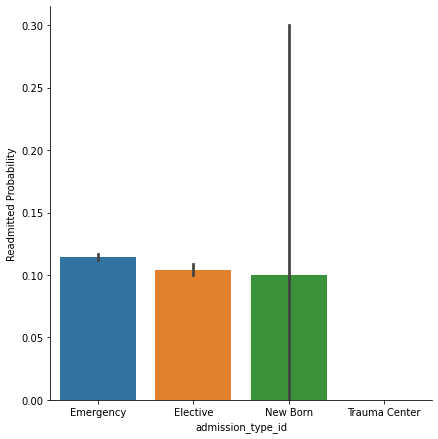

In [25]:
g = sns.catplot(x = "admission_type_id", y ="readmitted", 
                    data = diabet, height = 6, kind = "bar")
g.set_ylabels("Readmitted Probability")
plt.show()

### **Discharge Disposition ID**
-Integer identifier corresponding to 29 distinct values. For example, discharged to home, expired, and not available

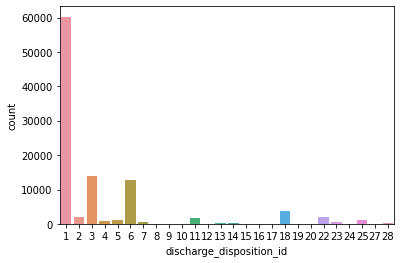

In [26]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

When we look the graph, we can see too much values. Getting rid of that situation,
 we applied this rules: 
- If any one includes **"home"** word I will grouping into one
- If not, it will be as **OTHER**
- NAN = 18, 25, 26

In [27]:
diabet['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [28]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabet["discharge_disposition_id"] = diabet["discharge_disposition_id"].replace(mapped_discharge)

- Now it will be more clear and readable

In [29]:
diabet['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

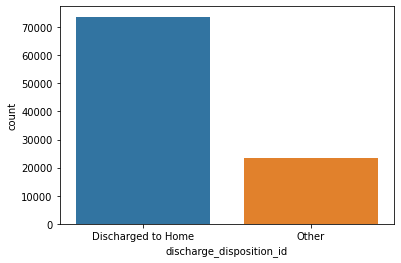

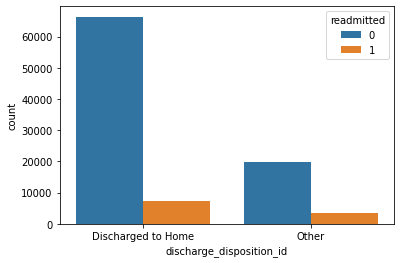

Proportions of ID's
Discharged to Home    73649
Other                 23434
Name: discharge_disposition_id, dtype: int64


In [30]:
sns.countplot(x ="discharge_disposition_id", data = diabet)
plt.show()

sns.countplot(x ="discharge_disposition_id", hue = "readmitted", data = diabet)
plt.show()

print("Proportions of ID's")
print(diabet.discharge_disposition_id.value_counts())

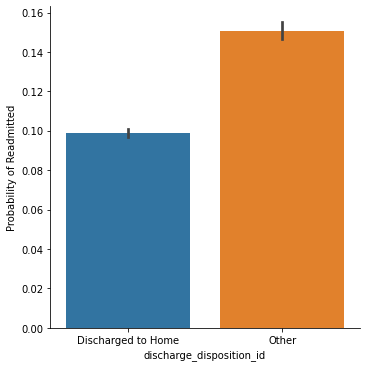

In [31]:
g = sns.catplot(x = "discharge_disposition_id", y="readmitted", 
                data = diabet, height = 5, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

### **Admission Source ID**

Integer identifier corresponding to 21 distinct values.For example, **physician referral, emergency room, and transfer from a hospital**


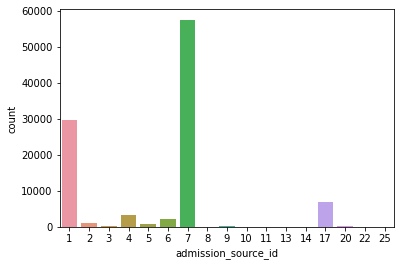

In [32]:
sns.countplot(x ="admission_source_id", data = diabet)
plt.show()

We can see that there is same problem here. Again we applied some map like:

- we'll put the similar ones together like **Referral or Transfer**
- we will replace **Null, Not Mapped, Unknown** values as NAN


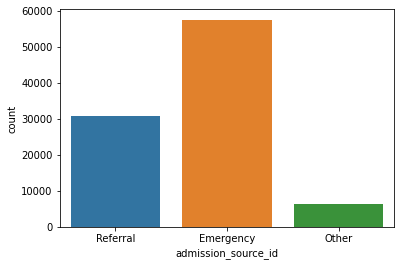

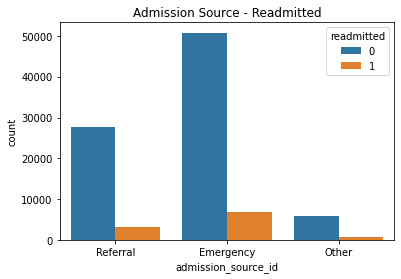

Emergency    57492
Referral     30855
Other         6474
Name: admission_source_id, dtype: int64


In [33]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabet.admission_source_id = diabet.admission_source_id.replace(mapped_adm)

sns.countplot(x = "admission_source_id", data = diabet)
plt.show()

sns.countplot(x = "admission_source_id", hue = "readmitted", data = diabet)
plt.title("Admission Source - Readmitted")
plt.show()


print(diabet.admission_source_id.value_counts())

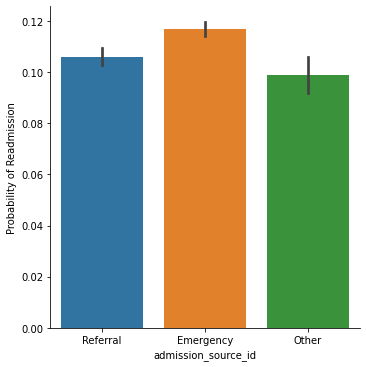

In [34]:
g = sns.catplot(x = "admission_source_id", y ="readmitted", 
                    data = diabet, kind = "bar", height= 5)
g.set_ylabels("Probability of Readmission")
plt.show()

- We see that **Readmitted Probability of Referral** is very close to **Emergency**, although **Emergency** is have more samples than other


## **Time in Hospital**
Integer number of days between admission and discharge. Shortly it is "treatment time"[](http://)

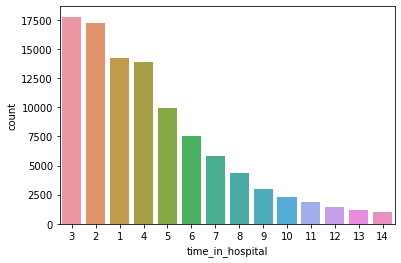

3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


In [35]:
sns.countplot(x="time_in_hospital", data = diabet,
              order = diabet.time_in_hospital.value_counts().index)
plt.show()

print(diabet.time_in_hospital.value_counts())


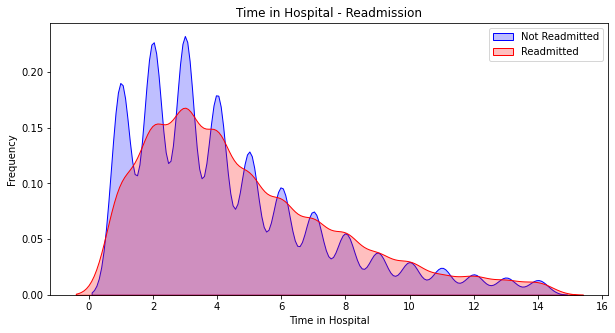

In [36]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "time_in_hospital"],
                 color = "b", shade = True, label = "Not Readmitted")

ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "time_in_hospital"],
                 color = "r", shade = True, label = "Readmitted")
ax.legend(loc="upper right")

ax.set_xlabel("Time in Hospital")
ax.set_ylabel("Frequency")
ax.set_title("Time in Hospital - Readmission")
plt.show()

- Most of people stayed 2 - 3 days in hospital


### **Number of Lab Procedures**
Number of lab tests performed during the encounter

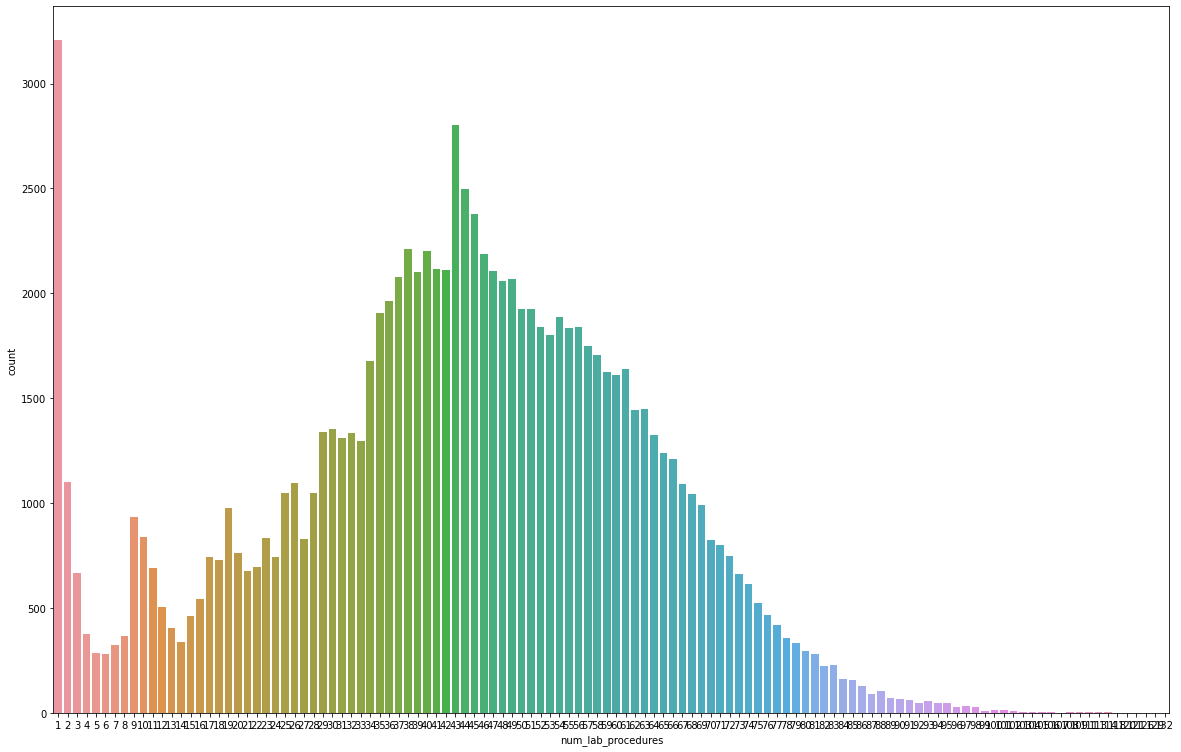

Proportions of Column
1     3208
43    2804
44    2496
45    2376
38    2212
40    2201
46    2189
41    2117
42    2113
47    2106
Name: num_lab_procedures, dtype: int64


In [37]:
plt.figure(figsize=(20,13))
sns.countplot(x = "num_lab_procedures", data = diabet)
plt.show()

print("Proportions of Column")
print(diabet.num_lab_procedures.value_counts().head(10))

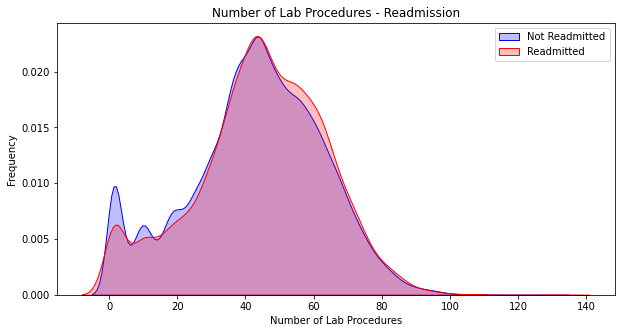

In [38]:
fig = plt.figure(figsize=(10,5))

#readmitted = 0
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 0), "num_lab_procedures"],
                 color = "b", shade = True,label = "Not Readmitted")

#readmitted = 1
ax = sns.kdeplot(diabet.loc[(diabet.readmitted == 1), "num_lab_procedures"],
                 color = "r", shade = True, label = "Readmitted")

ax.legend(loc="upper right")

ax.set_xlabel("Number of Lab Procedures")
ax.set_ylabel("Frequency")
ax.set_title("Number of Lab Procedures - Readmission")

plt.show()

### **Number of Procedures**
Number of procedures (other than lab tests) performed during the encounter

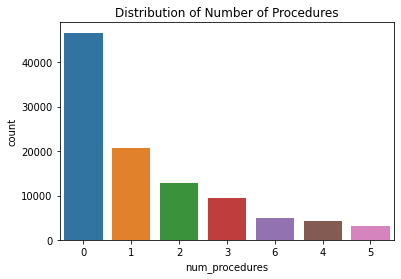

Proportions of Values
0    45.843774
1    20.381671
2    12.495701
3     9.279404
6     4.868174
4     4.107583
5     3.023692
Name: num_procedures, dtype: float64


In [39]:
sns.countplot(x = diabet.num_procedures, order = diabet.num_procedures.value_counts().index)
plt.title("Distribution of Number of Procedures")
plt.show()

print("Proportions of Values")
print(diabet.num_procedures.value_counts(normalize=True)*100)


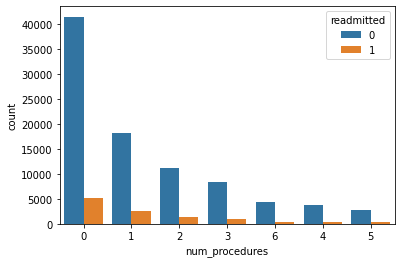

In [40]:
sns.countplot(x = "num_procedures", hue = "readmitted", 
              data = diabet, order = diabet.num_procedures.value_counts().index)
plt.show()

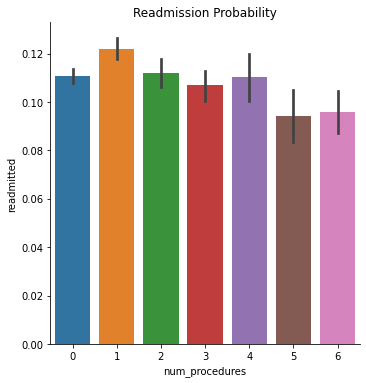

In [41]:
sns.catplot(x = "num_procedures", y = "readmitted",
               data = diabet, kind = "bar", height = 5)
plt.title("Readmission Probability")
plt.show()

## **Number of Medications**
Number of distinct generic names administered during the encounter

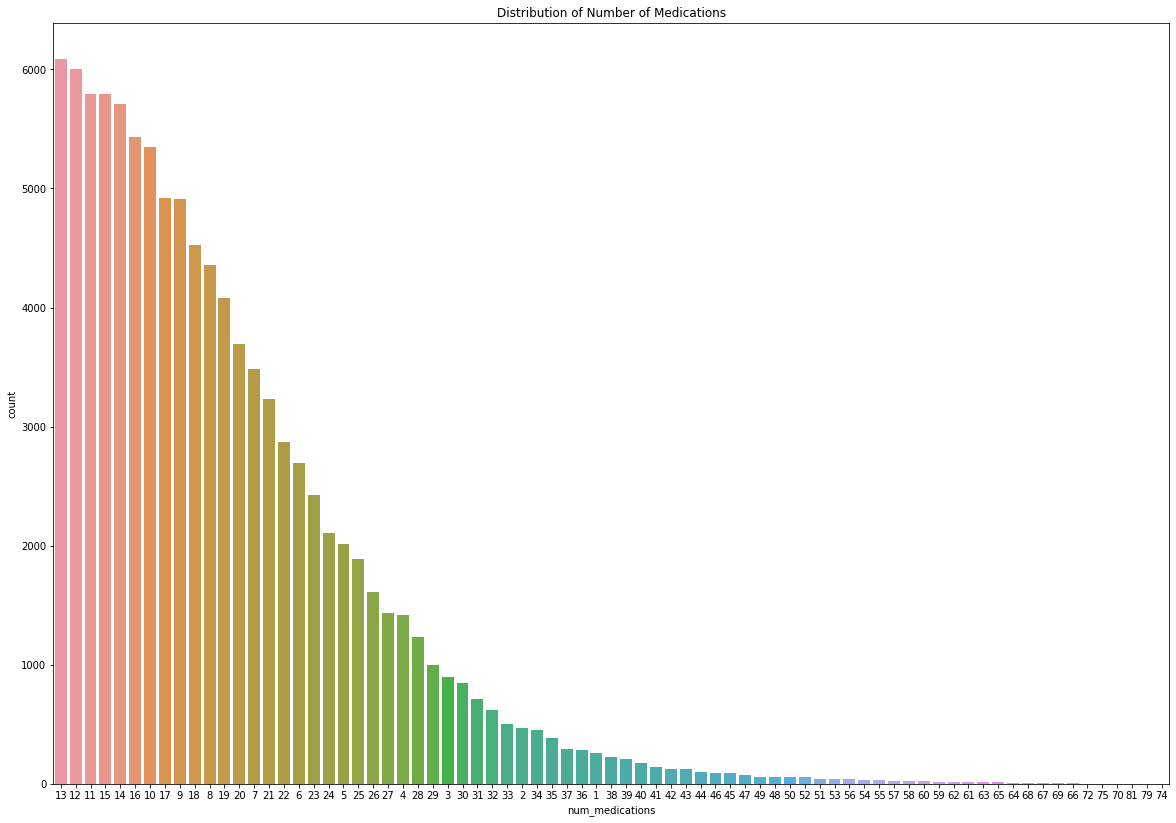

13    6086
12    6004
11    5795
15    5792
14    5707
      ... 
75       2
70       2
81       1
79       1
74       1
Name: num_medications, Length: 75, dtype: int64


In [42]:
plt.figure(figsize=(20,14))
sns.countplot(x="num_medications", data = diabet, 
        order = diabet.num_medications.value_counts().index)
plt.title("Distribution of Number of Medications")
plt.show()

print(diabet.num_medications.value_counts())

### **Diag1, Diag2 and Diag3**
- In diag section there are lots of ID that belong the specific name. So we'll map them

In [43]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [44]:
diabet = map_diagnosis(diabet,["diag_1","diag_2","diag_3"])

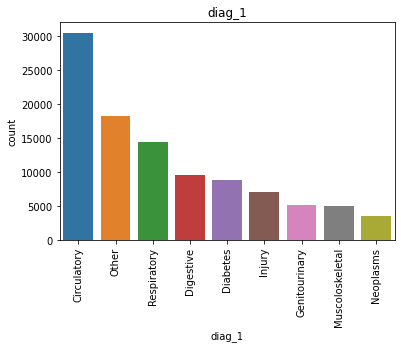

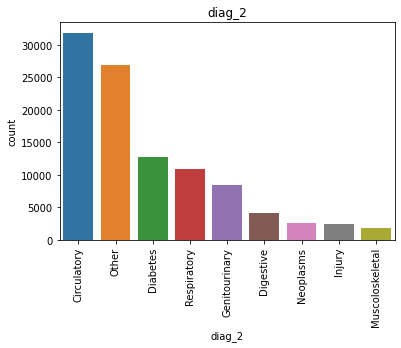

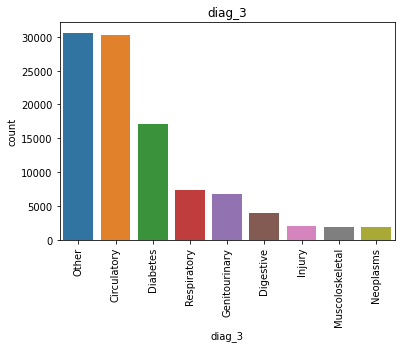

In [45]:
def plot_diags(col,data):
    sns.countplot(x = col, data = data,
            order = data[f"{col}"].value_counts().index)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

diag_cols = ["diag_1","diag_2","diag_3"]

for diag in diag_cols:
    plot_diags(diag,diabet)


## **Diabetes medications**

- There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.
- But firstly, lets look at the medications

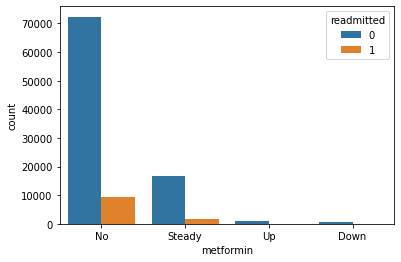

METFORMIN
No        81776
Steady    18345
Up         1067
Down        575
Name: metformin, dtype: int64


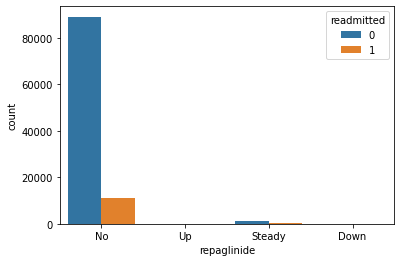

REPAGLINIDE
No        100224
Steady      1384
Up           110
Down          45
Name: repaglinide, dtype: int64


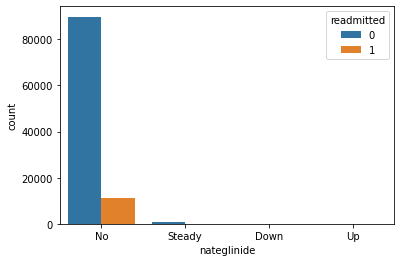

NATEGLINIDE
No        101060
Steady       668
Up            24
Down          11
Name: nateglinide, dtype: int64


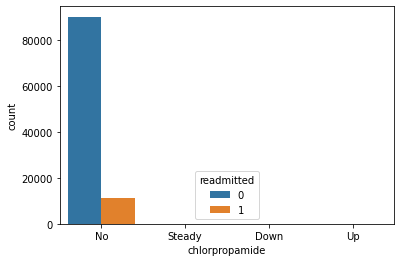

CHLORPROPAMIDE
No        101677
Steady        79
Up             6
Down           1
Name: chlorpropamide, dtype: int64


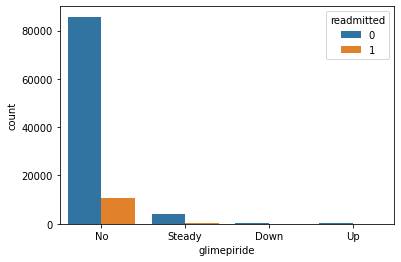

GLIMEPIRIDE
No        96572
Steady     4670
Up          327
Down        194
Name: glimepiride, dtype: int64


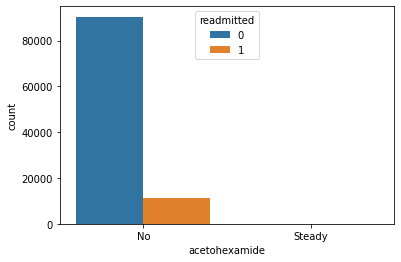

ACETOHEXAMIDE
No        101762
Steady         1
Name: acetohexamide, dtype: int64


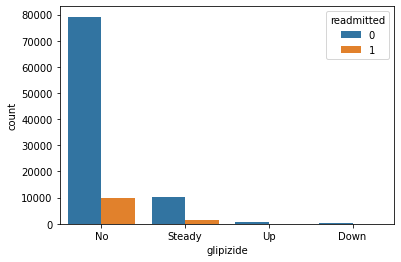

GLIPIZIDE
No        89078
Steady    11355
Up          770
Down        560
Name: glipizide, dtype: int64


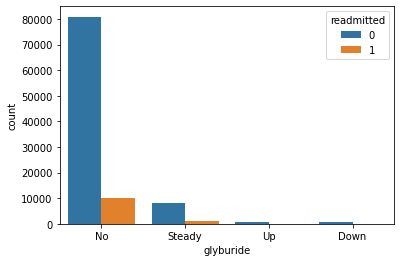

GLYBURIDE
No        91113
Steady     9274
Up          812
Down        564
Name: glyburide, dtype: int64


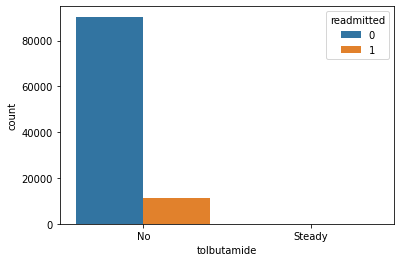

TOLBUTAMIDE
No        101740
Steady        23
Name: tolbutamide, dtype: int64


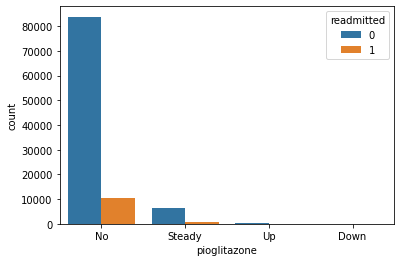

PIOGLITAZONE
No        94436
Steady     6975
Up          234
Down        118
Name: pioglitazone, dtype: int64


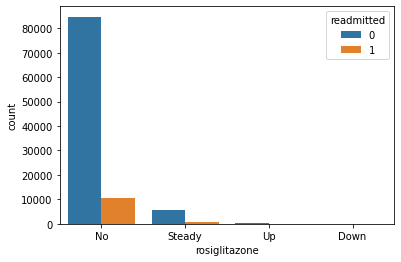

ROSIGLITAZONE
No        95399
Steady     6099
Up          178
Down         87
Name: rosiglitazone, dtype: int64


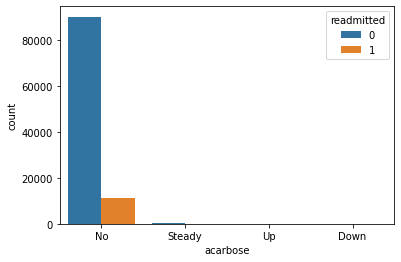

ACARBOSE
No        101455
Steady       295
Up            10
Down           3
Name: acarbose, dtype: int64


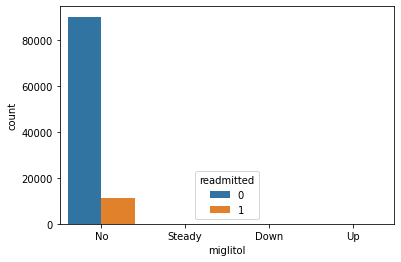

MIGLITOL
No        101725
Steady        31
Down           5
Up             2
Name: miglitol, dtype: int64


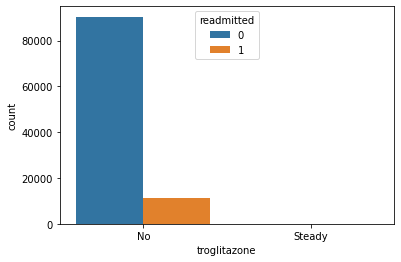

TROGLITAZONE
No        101760
Steady         3
Name: troglitazone, dtype: int64


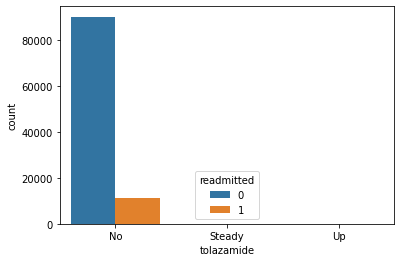

TOLAZAMIDE
No        101724
Steady        38
Up             1
Name: tolazamide, dtype: int64


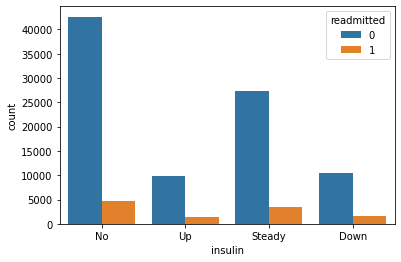

INSULIN
No        47380
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64


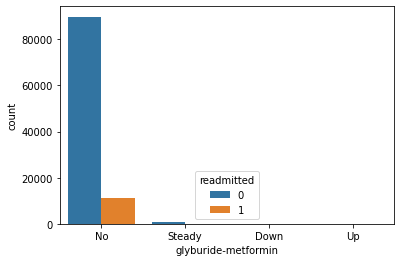

GLYBURIDE-METFORMIN
No        101057
Steady       692
Up             8
Down           6
Name: glyburide-metformin, dtype: int64


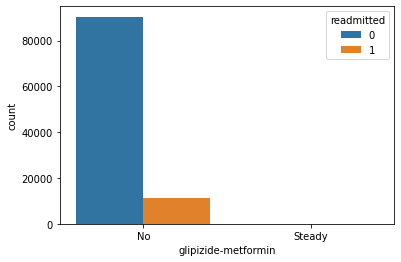

GLIPIZIDE-METFORMIN
No        101750
Steady        13
Name: glipizide-metformin, dtype: int64


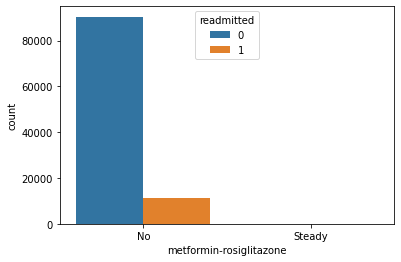

METFORMIN-ROSIGLITAZONE
No        101761
Steady         2
Name: metformin-rosiglitazone, dtype: int64


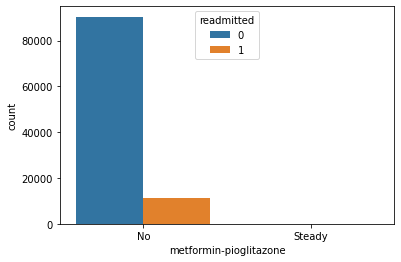

METFORMIN-PIOGLITAZONE
No        101762
Steady         1
Name: metformin-pioglitazone, dtype: int64


In [46]:
drug_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
             'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
             'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
             'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 
             'metformin-rosiglitazone', 'metformin-pioglitazone']

def explore_drug(drugs):

  for drug in drugs:
    sns.countplot(x = drug, 
                  hue = "readmitted",
                  data = diabet)
    plt.show()
    print(drug.upper())
    print(diabet[f"{drug}"].value_counts())
    

explore_drug(drug_cols)

## **Change**
Indicates if there was a change in diabetic medications (either dosage or generic
name). Values: 
- **“change”** 
- **“no change”**

In [47]:
diabet.change.value_counts()

No    54754
Ch    47009
Name: change, dtype: int64

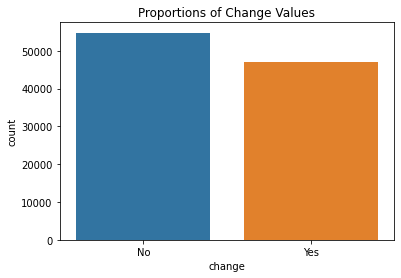

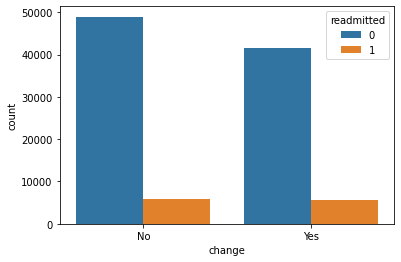

In [48]:
diabet.change = diabet.change.replace("Ch","Yes")

sns.countplot(x = "change", data = diabet)
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "change", hue = "readmitted", data = diabet)
plt.show()


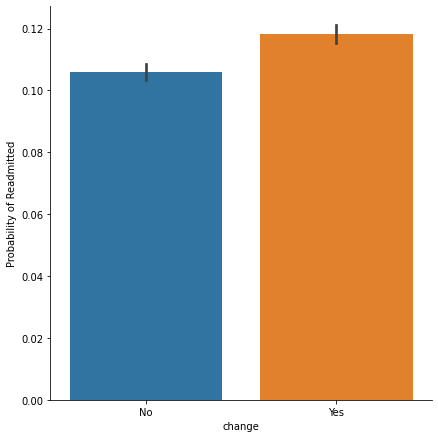

In [49]:
g = sns.catplot(x = "change", y="readmitted", data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()                                                                                

## **Glucose Serum Test Result**<br>
Indicates the range of the result or if the test was not taken.<br> 
Values: 
- “>200,” 
- “>300,”
- “normal,” 
- “none” if not measured<br>

We decided use the Glucose Serum Test Result like as follows:


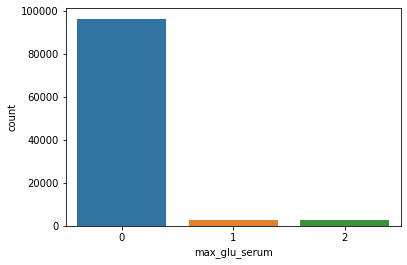

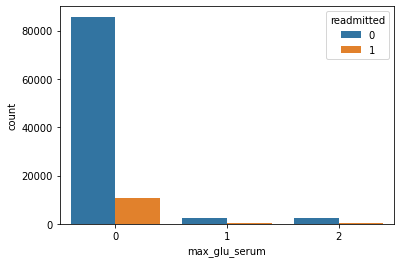

0    96417
2     2749
1     2597
Name: max_glu_serum, dtype: int64


In [50]:
diabet["max_glu_serum"] = diabet["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

sns.countplot(x = "max_glu_serum", data = diabet)
plt.show()

sns.countplot(x = "max_glu_serum",hue = "readmitted", data = diabet)
plt.show()

print(diabet.max_glu_serum.value_counts())

## **A1c test result**

Indicates the range of the result or if the test was not taken. <br>
Values: 
- “>8” if the result
was greater than 8%, 
- “>7” if the result was greater than 7% but less than 8%, “normal”
- if the result was less than 7%, and “none” if not measured.

We decided use the A1c test result like as follows:

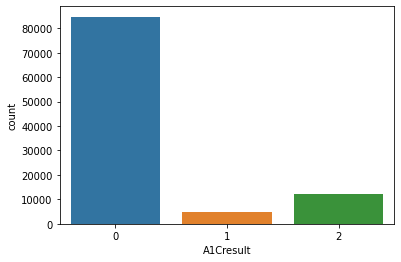

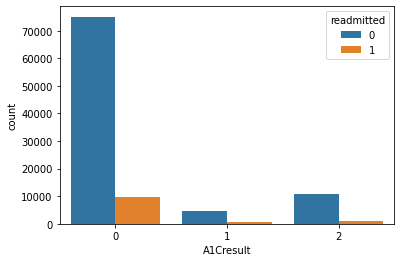

0    84745
2    12028
1     4990
Name: A1Cresult, dtype: int64


In [51]:
diabet["A1Cresult"] = diabet["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

sns.countplot(x = "A1Cresult", data = diabet)
plt.show()

sns.countplot(x = "A1Cresult",hue = "readmitted", data = diabet)
plt.show()

print(diabet.A1Cresult.value_counts())

## **Diabetes medications**
Indicates if there was any diabetic medication prescribed. Values: **“yes”** and **“no”**

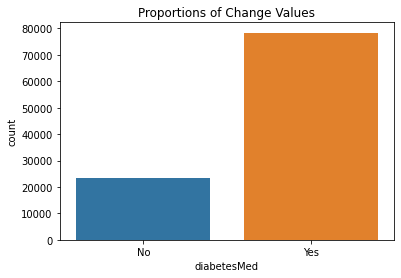

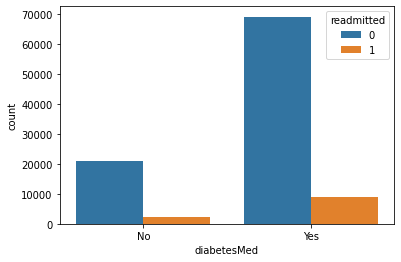

Yes    78361
No     23402
Name: diabetesMed, dtype: int64


In [52]:
sns.countplot(x = "diabetesMed", data = diabet )
plt.title("Proportions of Change Values")
plt.show()

sns.countplot(x = "diabetesMed", hue = "readmitted", data = diabet)
plt.show()

print(diabet.diabetesMed.value_counts())

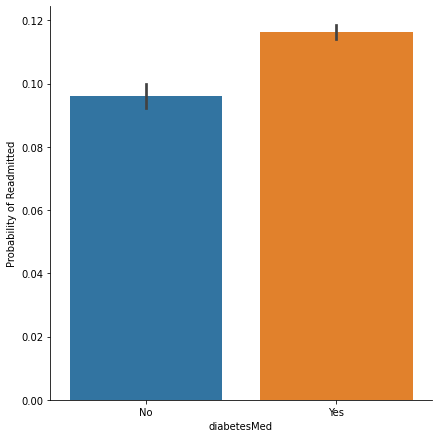

In [53]:
g = sns.catplot(x = "diabetesMed", y="readmitted", 
            data = diabet, height = 6, kind ="bar")
g.set_ylabels("Probability of Readmitted")
plt.show()

In [54]:
diabet.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          6942
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [55]:
#from google.colab import files

#diabet.to_csv('submit.csv',index=0)

#files.download('submit.csv')

In [56]:
 diabet['race'] = diabet['race'].fillna(diabet['race'].mode()[0])

In [57]:
diabet['admission_type_id'] = diabet['admission_type_id'].fillna(diabet['admission_type_id'].mode()[0])

In [58]:
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].fillna(diabet['discharge_disposition_id'].mode()[0])

In [59]:
diabet['admission_source_id'] = diabet['admission_source_id'].fillna(diabet['admission_source_id'].mode()[0])

In [60]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


# Dropping the duplicates entries


In [61]:
cat_data = diabet.select_dtypes('O')

num_data = diabet.select_dtypes(np.number)

cat_data

,race,gender,admission_type_id,discharge_disposition_id,admission_source_id,diag_1,diag_2,diag_3,metformin,repaglinide,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,Caucasian,Female,Emergency,Discharged to Home,Referral,Diabetes,Other,Other,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Caucasian,Female,Emergency,Discharged to Home,Emergency,Other,Diabetes,Other,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
2,AfricanAmerican,Female,Emergency,Discharged to Home,Emergency,Other,Diabetes,Other,No,No,...,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,Emergency,Discharged to Home,Emergency,Other,Diabetes,Circulatory,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes
4,Caucasian,Male,Emergency,Discharged to Home,Emergency,Neoplasms,Neoplasms,Diabetes,No,No,...,No,No,Steady,No,No,No,No,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,AfricanAmerican,Male,Emergency,Other,Emergency,Diabetes,Other,Circulatory,Steady,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
101762,AfricanAmerican,Female,Emergency,Other,Other,Digestive,Other,Digestive,No,No,...,No,No,Steady,No,No,No,No,No,No,Yes
101763,Caucasian,Male,Emergency,Discharged to Home,Emergency,Other,Genitourinary,Other,Steady,No,...,No,No,Down,No,No,No,No,No,Yes,Yes
101764,Caucasian,Female,Emergency,Other,Emergency,Injury,Other,Injury,No,No,...,No,No,Up,No,No,No,No,No,Yes,Yes


In [62]:
cat_data = pd.get_dummies(cat_data,drop_first= True)
cat_data.shape

(101763, 83)

In [63]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()

#for i in cat_data:
 # cat_data[i] = le.fit_transform(cat_data[i])

In [64]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()

,encounter_id,patient_nbr,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_Yes,diabetesMed_Yes
0,2278392,8222157,5,1,41,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,149190,55629189,15,3,59,0,18,0,0,0,...,1,1,0,0,0,0,0,0,1,1
2,64410,86047875,25,2,11,5,13,2,0,1,...,0,1,0,0,0,0,0,0,0,1
3,500364,82442376,35,2,44,1,16,0,0,0,...,1,1,0,0,0,0,0,0,1,1
4,16680,42519267,45,1,51,0,8,0,0,0,...,0,1,0,0,0,0,0,0,1,1


In [65]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [66]:
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,insulin_Up,glyburide-metformin_No,glyburide-metformin_Steady,glyburide-metformin_Up,glipizide-metformin_Steady,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_Yes,diabetesMed_Yes
0,5,1,41,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,15,3,59,0,18,0,0,0,9,0,...,1,1,0,0,0,0,0,0,1,1
2,25,2,11,5,13,2,0,1,6,0,...,0,1,0,0,0,0,0,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,1,1,0,0,0,0,0,0,1,1
4,45,1,51,0,8,0,0,0,5,0,...,0,1,0,0,0,0,0,0,1,1


# Splitting the dependent and independent variable

In [69]:
X = data.drop('readmitted',axis=1)

y = data['readmitted']

# Splitting into train and test

In [75]:
#modelling now
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

In [76]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [77]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(X_train),columns=X_train.columns)
X_test_scaled = pd.DataFrame(SC.transform(X_test),columns=X_test.columns)

In [78]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((91586, 127), (10177, 127), (91586,), (10177,))

In [79]:
LR = LogisticRegression()

LR.fit(X_train_scaled,y_train)

LogisticRegression()

In [80]:
LR.score(X_train_scaled,y_train)


0.8885419168868605

In [81]:
LR.score(X_test_scaled,y_test)

0.8862140119878157

In [82]:
RF = RandomForestClassifier()

RF.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [85]:
RF.score(X_train_scaled,y_train)

0.9999344878038128

In [86]:
RF.score(X_test_scaled,y_test)

0.8876879237496316

In [90]:
y_pred = RF.predict(X_test)



In [91]:
confusion_matrix(y_test,y_pred)

array([[9029,    2],
       [1143,    3]])

In [92]:
accuracy_score(y_test,y_pred)

0.8874914021813894

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


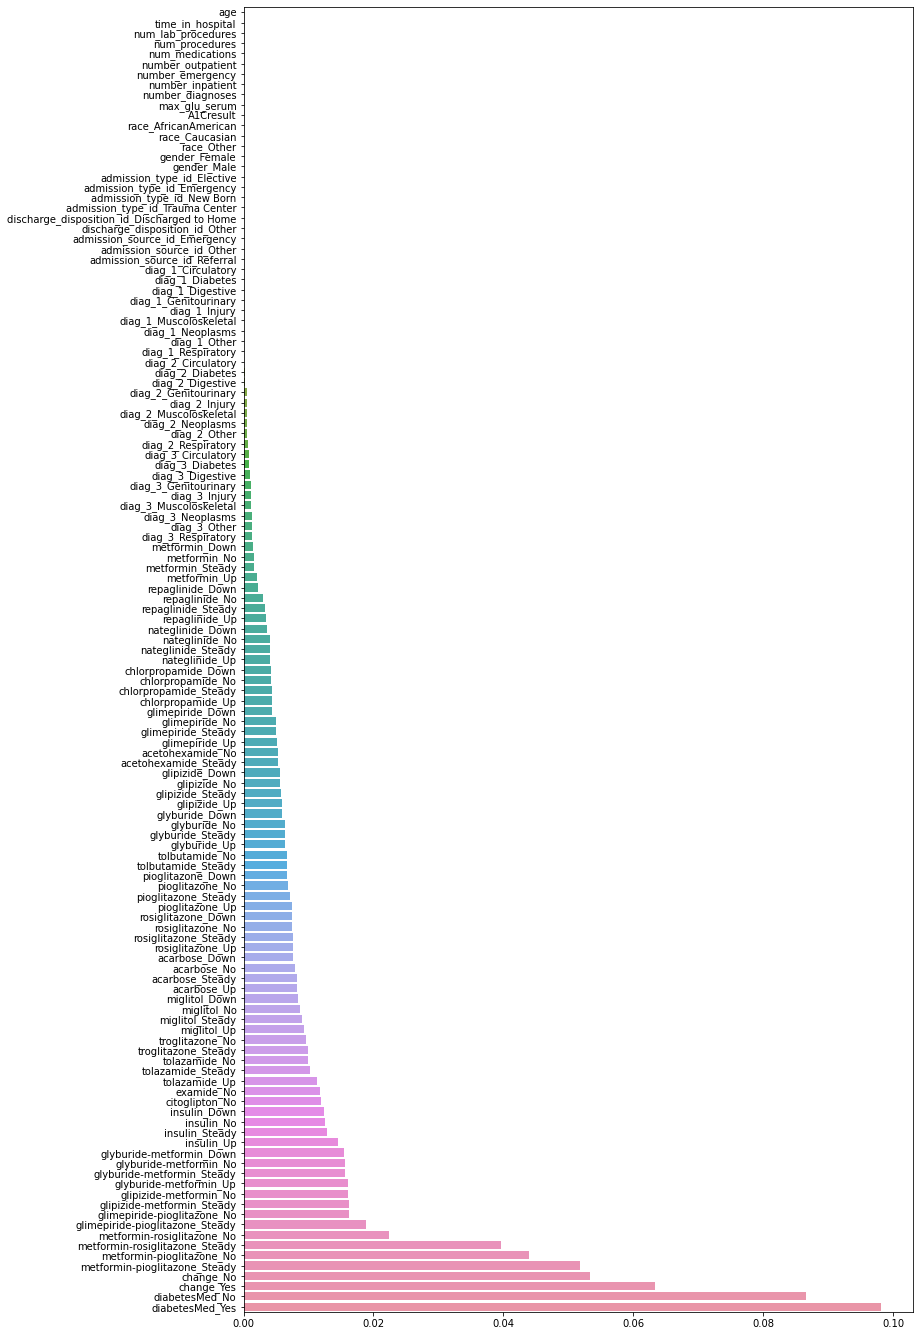

In [93]:
plt.figure(figsize=(12,24))
sns.barplot(sorted(RF.feature_importances_),X_train.columns);

In [94]:
z = pd.DataFrame([RF.feature_importances_,X_train.columns]).T

<AxesSubplot:xlabel='importance', ylabel='Feature'>

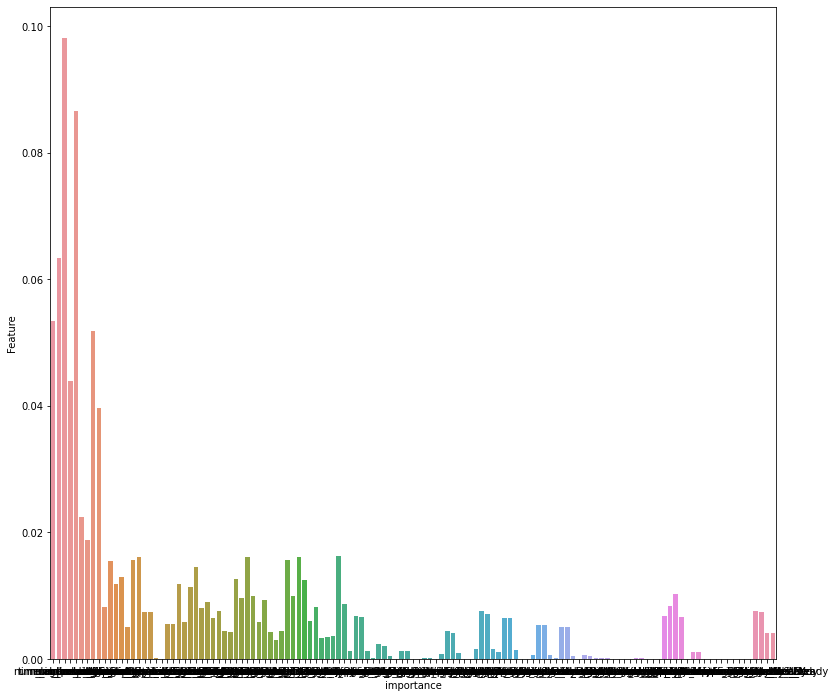

In [95]:
z.columns = ['Feature','importance']
plt.figure(figsize=(13,12))

sns.barplot(y=z['Feature'],x=z['importance'])

In [96]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


In [97]:
X.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,glimepiride-pioglitazone_No,glimepiride-pioglitazone_Steady,metformin-rosiglitazone_No,metformin-rosiglitazone_Steady,metformin-pioglitazone_No,metformin-pioglitazone_Steady,change_No,change_Yes,diabetesMed_No,diabetesMed_Yes
0,5,1,41,0,1,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,15,3,59,0,18,0,0,0,9,0,...,1,0,1,0,1,0,0,1,0,1
2,25,2,11,5,13,2,0,1,6,0,...,1,0,1,0,1,0,1,0,0,1
3,35,2,44,1,16,0,0,0,7,0,...,1,0,1,0,1,0,0,1,0,1
4,45,1,51,0,8,0,0,0,5,0,...,1,0,1,0,1,0,0,1,0,1


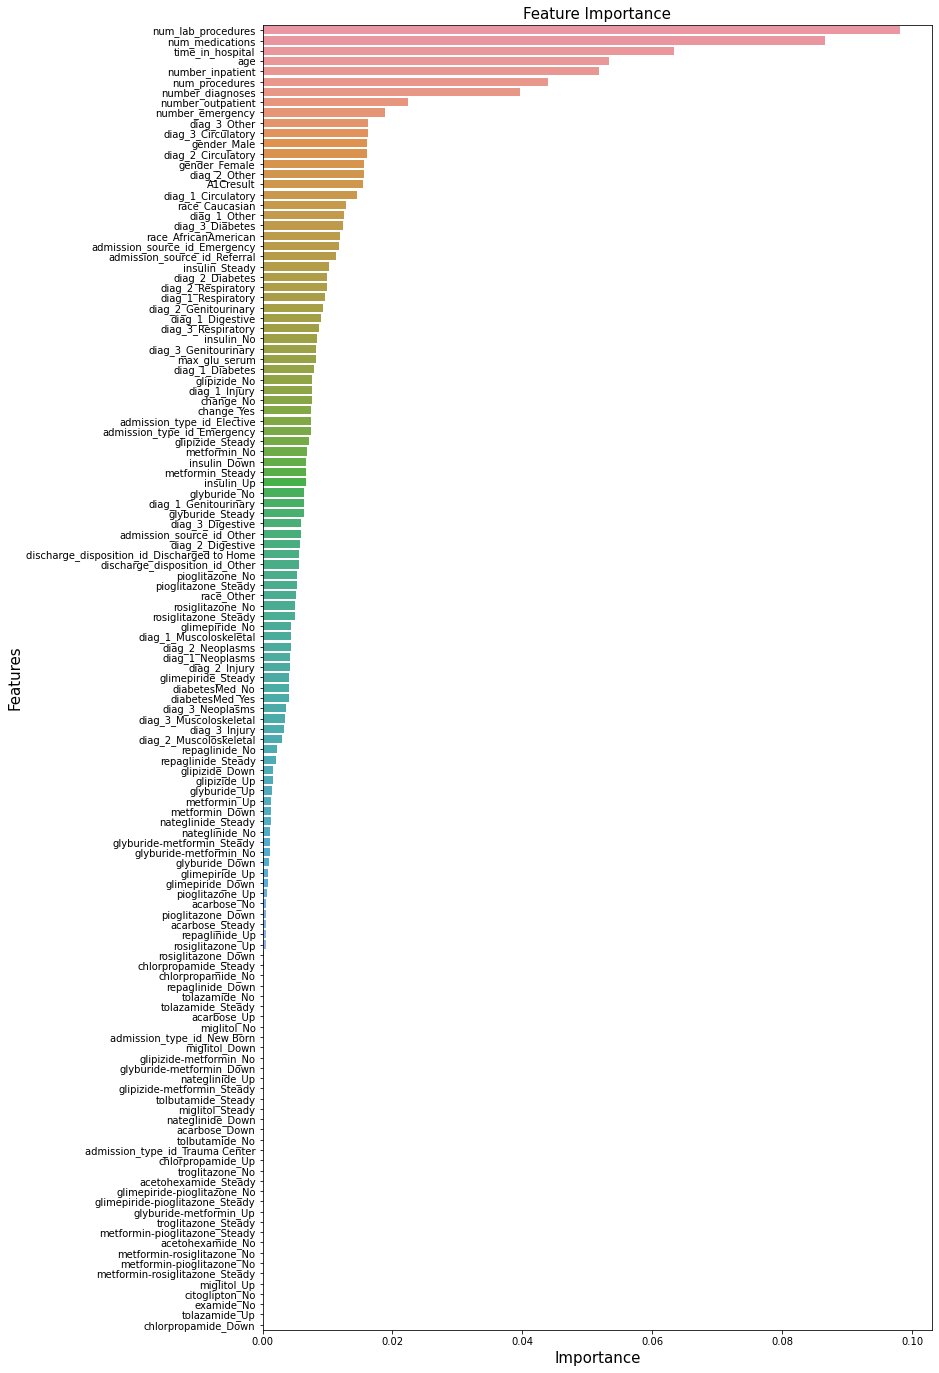

In [98]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': RF.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
plt.figure(figsize=(12,24))
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

In [99]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model, test_data):
    
    # predict the target values using X_test
    y_pred = model.predict(test_data)
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)


    # display the plot
    plt.show()
  

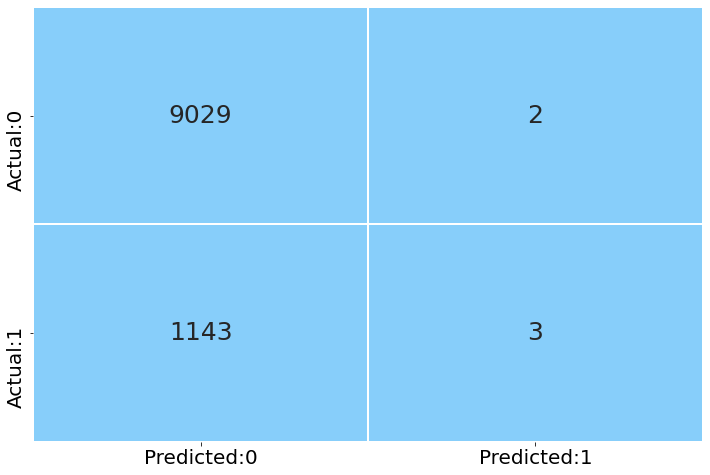

In [100]:
# define a to plot a confusion matrix for the model

    
    # predict the target values using X_test

    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
plt.figure(figsize=(12,8))
cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'], cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)


    # display the plot
plt.show()
  

In [101]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model, test_data):
    
    # predict the probability of target variable using X_test
    # consider the probability of positive class by subsetting with '[:,1]'
    y_pred_prob = model.predict_proba(test_data)[:,1]
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC curve for Cancer Prediction Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

## GRID SEARCH CV

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'criterion':['gini','entropy'],
          'max_depth':[5,7,8,9,10,1,2,3,4,5,6,7,8,9,10,12,12],
         'random_state':[1,2,3,4,,5,6,7,8,9,10,12],
       'learning_rate': [0.045,0.034,0.012,0.034,0.0023],
        'n_estimators': [20000,50000,23000,133400,43560,54643],
        'max_bin': [94,75,34,56,23,66,67,13,67,123,89],
        'num_leaves': [10,6,7,8,9,11,12,34,45,21,34],
        'max_depth': [27, 12,15,16,17,14,21,31,24,25],
        'reg_alpha': [8.457, 9.945,6.57,7.436,9.8765,10.23],
        'reg_lambda': [6.853,4.5,6.68,10.35,8.346,9.35],
        'subsample':[ 0.749,0.436,0.235,0.346,0.264,0.8568]
         }        
         
model = LGBClassifier()
grid = GridSearchCV(estimator=model,param_grid=params)


In [6]:
grid.fit(X,y)


GridSearchCV(estimator=DecisionTreeClassifier(),
            params = {'criterion':['gini','entropy'],
                      'max_depth':[5,7,8,9,10,3,4,5,6,7,8,9,10],
                     'random_state':[1,2,3,4,5,6,7,8,9,12,23],
                      'learning_rate': [0.045,0.034,0.012,0.034,0.0023],
                      'n_estimators': [20000,50000,23000,133400,43560,54643],
                      'max_bin': [94,75,34,56,23,66,67,13,67,123,89],
                      'num_leaves': [10,6,7,8,9,11,12,34,45,21,34],
                      'max_depth': [27, 12,15,16,17,14,21,31,24,25],
                      'reg_alpha': [8.457, 9.945,6.57,7.436,9.8765,10.23],
                      'reg_lambda': [6.853,4.5,6.68,10.35,8.346,9.35],
                      'subsample':[ 0.749,0.436,0.235,0.346,0.264,0.8568]}      
         





In [7]:
grid.best_params_

{'learning_rate': 0.045,
 'n_estimators': 20000,
 'max_bin': 94,
 'num_leaves': 10,
 'max_depth': 27,
 'reg_alpha': 8.457,
 'reg_lambda': 6.853,
 'subsample': 0.749}

In [107]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg


lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

from lightgbm import LGBMClassifier
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.33072
Early stopping, best iteration is:
[408]	valid_0's binary_logloss: 0.330708
roc_auc_score: 0.6717154617703843
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.332241
Early stopping, best iteration is:
[390]	valid_0's binary_logloss: 0.332204
roc_auc_score: 0.6557237281677775
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.331968
Early stopping, best iteration is:
[351]	valid_0's binary_logloss: 0.331954
roc_auc_score: 0.6651920162754136
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.334019
Early stopping, best iteration is:
[556]	valid_0's binary_logloss: 0.33392

In [103]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

from xgboost import XGBClassifier
xgb_model = cross_val(X, y, XGBClassifier, xgb_params)f1_score

Fold: 0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:28:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68120
[400]	validation_0-logloss:0.33233
[800]	validation_0-logloss:0.33038
[1200]	validation_0-logloss:0.33001
[1581]	validation_0-logloss:0.32985


/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


roc_auc_score: 0.6758441304811508
--------------------------------------------------
Fold: 1


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:29:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68113


KeyboardInterrupt: 

In [70]:
# Using OVERSAMPLING METHOD!!!!

In [71]:
import imblearn

from imblearn.over_sampling import SMOTE


In [72]:
oversample = SMOTE()

X,y = oversample.fit_resample(X,y)

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=1)

In [111]:
RF = RandomForestClassifier()

RF.fit(X_train,y_train)

RandomForestClassifier()

In [112]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9999877097031893, 0.9390554142240902)

In [ ]:
xgb_params= {'n_estimators': 20000, 
             'max_depth': 6, 
             'learning_rate': 0.0201, 
             'reg_lambda': 29.326, 
             'subsample': 0.818, 
             'colsample_bytree': 0.235, 
             'colsample_bynode': 0.820, 
             'colsample_bylevel': 0.453}

from xgboost import XGBClassifier
xgb_model = cross_val(X, y, XGBClassifier, xgb_params)

Fold: 0


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[09:02:14] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	validation_0-logloss:0.68672
[400]	validation_0-logloss:0.28003
[800]	validation_0-logloss:0.22717
[1200]	validation_0-logloss:0.20998
[1600]	validation_0-logloss:0.20244
[2000]	validation_0-logloss:0.19827


In [74]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, y, model, params, folds=9):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=21)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg


lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

from lightgbm import LGBMClassifier
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.273582
[800]	valid_0's binary_logloss: 0.266514
[1200]	valid_0's binary_logloss: 0.26346
[1600]	valid_0's binary_logloss: 0.261332
[2000]	valid_0's binary_logloss: 0.259873
[2400]	valid_0's binary_logloss: 0.258665
[2800]	valid_0's binary_logloss: 0.257701
[3200]	valid_0's binary_logloss: 0.256866
[3600]	valid_0's binary_logloss: 0.25618
[4000]	valid_0's binary_logloss: 0.255379
[4400]	valid_0's binary_logloss: 0.254771
[4800]	valid_0's binary_logloss: 0.254184
[5200]	valid_0's binary_logloss: 0.253567
[5600]	valid_0's binary_logloss: 0.253134
Early stopping, best iteration is:
[5694]	valid_0's binary_logloss: 0.253074
roc_auc_score: 0.9469611811550391
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.273296
[800]	valid_0's binary_logloss: 0.265311
[1200]	valid_0's binary_logloss:

In [79]:
y_pred = lgb_model.predict(X_test)
from sklearn.metrics import f1_score

In [80]:
f1_score(y_test,y_pred)  

0.9105281648905024

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9101
           1       0.96      0.87      0.91      8981

    accuracy                           0.92     18082
   macro avg       0.92      0.92      0.92     18082
weighted avg       0.92      0.92      0.92     18082



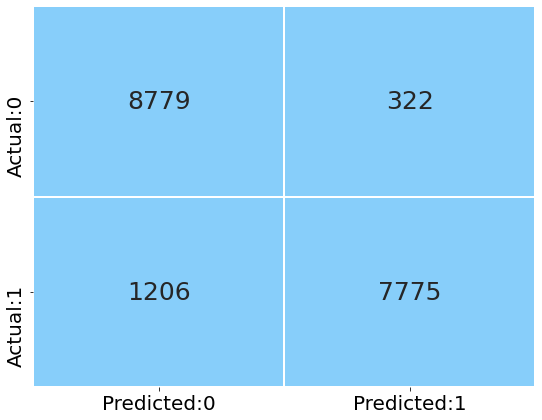

In [83]:
# define a to plot a confusion matrix for the model

    
    # predict the target values using X_test

    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
plt.figure(figsize=(9,7))
cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap =['lightskyblue'], cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)


    # display the plot
plt.show()
  

In [2]:
recall = 7775/(7775+1206)
precision = 7775/(7775+322)
accuracy = (7775+8779)/(7775+8779+1206+322)
print('Precision is:',precision,'Recall is :',recall,'accuracy is:',accuracy)


Precision is: 0.9602321847597876 Recall is : 0.8657165126377909 accuracy is: 0.9154960734432032


In [86]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      9101
           1       0.96      0.87      0.91      8981

    accuracy                           0.92     18082
   macro avg       0.92      0.92      0.92     18082
weighted avg       0.92      0.92      0.92     18082

